Importing necessary Modules

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Taking Dataset from MNIST fashion Dataset

In [5]:
datasets = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)= datasets.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 32s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


In [6]:
dataset = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)= datasets.load_data()

In [7]:
train_images.shape

(60000, 28, 28)

it has 60000 images of 28*28 pixcles
Now, showing first five labels data

In [8]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

Let's take look on the any image of our train dataset

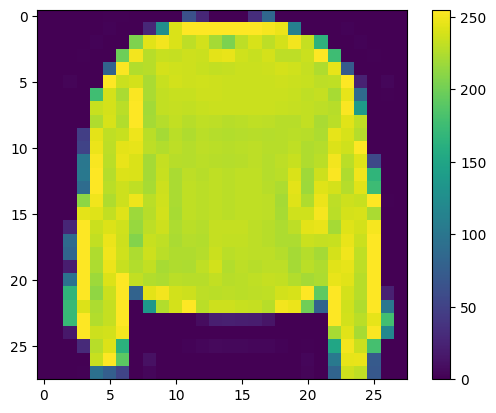

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_image = train_images/255.0
test_image = test_images/255.0

Model Creation

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
    ])

e:\pip\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Compilation

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model Fitting

In [17]:
model.fit(train_image,train_labels,epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7768 - loss: 0.6365
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8613 - loss: 0.3846
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8757 - loss: 0.3435
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8840 - loss: 0.3135
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8904 - loss: 0.2968
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8934 - loss: 0.2835
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8992 - loss: 0.2675
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9036 - loss: 0.2596
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9085 - loss: 0.2439
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9102 - loss: 0.2370
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9144 - loss: 0.2287
Epoch 12/15
1875/1875 ━━━━━━━━

Training Accuracy is 92%

In [20]:
losses,accuracy=model.evaluate(test_images,test_labels,verbose=1)
print('Accuracy is:',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8709 - loss: 58.7824
Accuracy is: 0.8705999851226807


Testing Accuracy is 87%

Now, Prediction

In [21]:
prediction=model.predict(test_images)
prediction[1]
np.argmax(prediction[1])
test_labels[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


np.uint8(2)

Verify Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


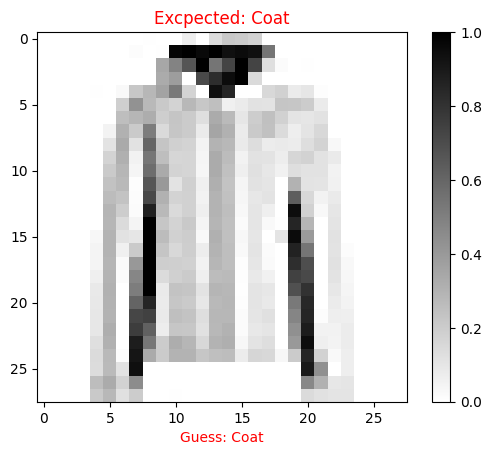

Coat


In [29]:
plt.rcParams['text.color'] = 'red'
plt.rcParams['axes.labelcolor'] = 'red'

def predict(model,image,correct_labels):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    prediction_class = class_names[np.argmax(prediction)]
    show_image(image,class_names[correct_labels],prediction_class)
    print(class_names[label])

def show_image(image,label,guess):
    plt.figure()
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_image[num]
label = test_labels[num]
predict(model, image, label)  